# Setup

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Comparing governance vs. non-governance RFs

In [3]:
# Reading in the cross-val predictions for comparison
normal_rf_fp = '/Users/emiliolr/Google Drive/My Drive/LIFE/hunting_analysis/final_results/raw_predictions/rf_hurdle_2.0mins_rebalance-classes_mammals_recreated_5-fold_random-blocking.csv'
gov_rf_fp = '/Users/emiliolr/Desktop/life-hunting/testing_governance/raw_predictions/rf_hurdle_2.0mins_rebalance-classes_mammals_recreated_5-fold_random-blocking.csv'

normal_rf = pd.read_csv(normal_rf_fp)
gov_rf = pd.read_csv(gov_rf_fp)

In [9]:
# How often do they agree on local extirpations?
(normal_rf['predicted_zero'] == gov_rf['predicted_zero']).mean()

0.9692167022249314

In [12]:
# Does the nonzero governance model tend to predict higher values?
(normal_rf['predicted_nonzero'] < gov_rf['predicted_nonzero']).mean()

0.4867418469978665

In [40]:
# How different, on average, are predictions?
np.median(np.abs(normal_rf['predicted'] - gov_rf['predicted']))

0.08903454341614614

Correlation of 0.802


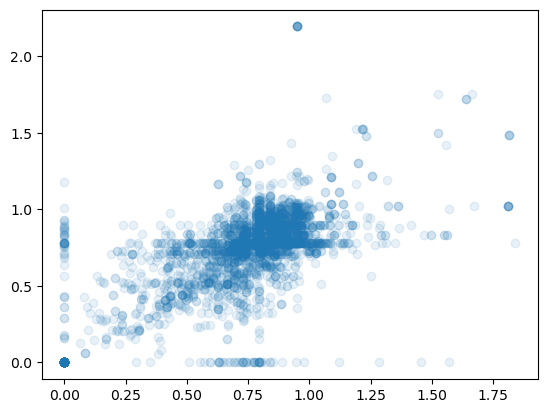

In [41]:
# How well correlated are overall predictions?
corr = np.corrcoef(normal_rf['predicted'], gov_rf['predicted'])[0, 1]
print(f'Correlation of {round(corr, 3)}')

plt.scatter(normal_rf['predicted'], gov_rf['predicted'], alpha = 0.1)

plt.show()

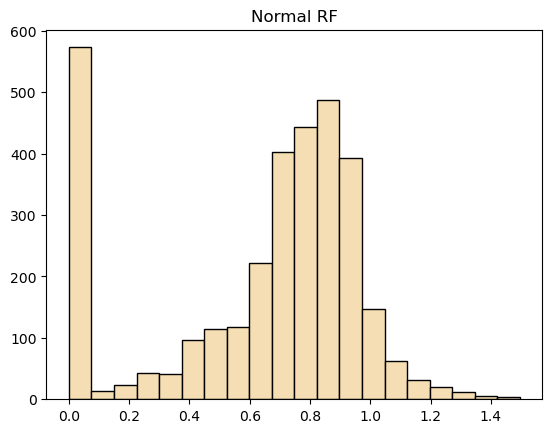

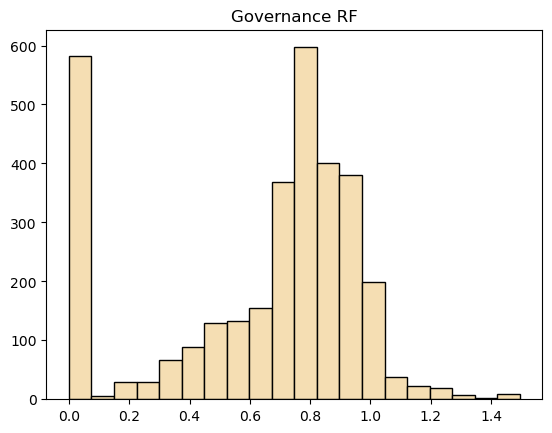

In [21]:
# Looking at the distribution of each
upper_cutoff = 1.5

normal_rf_pred = normal_rf['predicted'][normal_rf['predicted'] <= upper_cutoff]
gov_rf_pred = gov_rf['predicted'][gov_rf['predicted'] <= upper_cutoff]

plt.hist(normal_rf_pred, bins = 20, color = 'wheat', edgecolor = 'black')
plt.title('Normal RF')
plt.show()

plt.hist(gov_rf_pred, bins = 20, color = 'wheat', edgecolor = 'black')
plt.title('Governance RF')
plt.show()

# Dimensionality reduction for governance variables

In [19]:
# Reading in the training dataset w/governance
ben_lop2019_fp = '/Users/emiliolr/Google Drive/My Drive/LIFE/datasets/derived_datasets/benitez_lopez2019_recreated/benitez_lopez2019_recreated_extended.csv'
ben_lop2019 = pd.read_csv(ben_lop2019_fp)

In [20]:
just_gov = ben_lop2019[['Corruption', 'Government_Effectiveness', 'Political_Stability', 
                        'Regulation', 'Rule_of_Law', 'Accountability']].copy(deep = True)

In [21]:
scaler = StandardScaler()
just_gov = scaler.fit_transform(just_gov)
just_gov = pd.DataFrame(just_gov, columns = scaler.feature_names_in_)

In [22]:
pca = PCA(random_state = 1693)
just_gov_pca = pca.fit_transform(just_gov)

pca.explained_variance_ratio_.cumsum()

array([0.75764694, 0.88094034, 0.92885589, 0.9602128 , 0.98374859,
       1.        ])

In [23]:
np.unique(just_gov_pca[ : ,  : 2], axis = 0).shape

(113, 2)

In [24]:
pca.feature_names_in_

array(['Corruption', 'Government_Effectiveness', 'Political_Stability',
       'Regulation', 'Rule_of_Law', 'Accountability'], dtype=object)

In [25]:
pca.components_

array([[-0.43528102, -0.43879871, -0.26945079, -0.42692238, -0.43486869,
        -0.41714375],
       [ 0.1241015 ,  0.17213938, -0.94850352,  0.22830654,  0.01298178,
         0.05491371],
       [-0.2298196 ,  0.14584299,  0.05266074,  0.39734131,  0.4043036 ,
        -0.77575647],
       [-0.62884391,  0.18507598,  0.09357791,  0.54658697, -0.42576146,
         0.28550876],
       [ 0.29848685,  0.6731722 ,  0.09504473, -0.16362786, -0.55912543,
        -0.33062965],
       [-0.50771364,  0.51878668, -0.08469867, -0.53122678,  0.39161873,
         0.17420179]])